# Mock Exam: Jupyter Notebook
## Question 1

In [2]:
import sympy as sp 
t = sp.symbols('t')
T1,T2 = sp.Function('T1')(t),sp.Function('T2')(t)
flowrate = 1 #kg/s
Tin = 20
UA = 0.100
m1=10
m2=5
c1=4.200
c2=1.8
heater = 0.1*(1-sp.exp(-t/5))
tank1 = (c1*flowrate*(Tin-T1)+UA*(T1-T2))/(m1*c1)
tank2 = (UA*(T1-T2)+heater)/(m2*c2)
display(tank1,tank2)

-0.0976190476190476*T1(t) - 0.00238095238095238*T2(t) + 2.0

0.0111111111111111*T1(t) - 0.0111111111111111*T2(t) + 0.0111111111111111 - 0.0111111111111111*exp(-t/5)

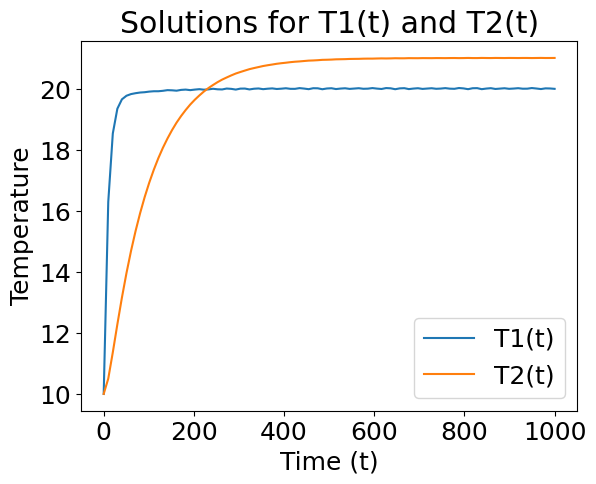

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def funcs(t, T):
    T1, T2 = T
    dT1dt = -0.102380952380952 * T1 + 0.00238095238095238 * T2 + 2.0
    dT2dt = 0.0111111111111111 * T1 - 0.0111111111111111 * T2 + 0.0111111111111111 - 0.0111111111111111 * np.exp(-t * 5)
    return [dT1dt, dT2dt]
ics = [10,10]
t_eval = np.linspace(0, 1000, 100)
solution = solve_ivp(funcs, (0, 1000), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Temperature")
plt.legend()
plt.title("Solutions for T1(t) and T2(t)")
plt.show()


## Question 2

In [ ]:
import sympy as sp

a,b,c = sp.symbols('a b c')
A= sp.Function('A')(a,b,c)
f=sp.Eq(a*b+(1/2*c*a),A)
g=sp.Eq(a+2*b+2*c,100)
display(f,g)

Eq(a*b + 0.5*a*c, A(a, b, c))

Eq(a + 2*b + 2*c, 100)

In [ ]:
#B
f,g = a*b+a/2*sp.sqrt(c*c-a*a/4) , a+2*b+2*c-100
l = sp.symbols('lambda')
L = sp.Function('L')(a,b,c,l)
lagrange = sp.Eq(f,l*g)

x,y,z=sp.Eq(f.diff(a),l*g.diff(a)),sp.Eq(f.diff(b),l*g.diff(b)),sp.Eq(f.diff(c),l*g.diff(c)).simplify()
display(x,y,z)

Eq(-a**2/(8*sqrt(-a**2/4 + c**2)) + b + sqrt(-a**2/4 + c**2)/2, lambda)

Eq(a, 2*lambda)

Eq(2*lambda, a*c/sqrt(-a**2 + 4*c**2))

In [ ]:
sol=sp.solve(z.subs(a,y.rhs),c)
C=sol[1]

In [ ]:

ans=sp.solve(x.subs(a,y.rhs).subs(c,C),b)
B=ans[0]


In [ ]:
lag = sp.solve(g.subs(a,y.rhs).subs(b,B).subs(c,C),l)
display(lag[0])

100 - 50*sqrt(3)

In [ ]:
sp.solve(y.subs(l,lag[0]),a)[0].evalf()

26.7949192431123

In [ ]:
sp.solve(z.subs(l,13.397).subs(a,26.79491924),c)[0]

15.4702307560877

In [ ]:
sp.solve(x.subs(a,26.79491924).subs(l,13.397).subs(c,15.47023075),b)[0]

21.1313192989918

$λ$=13.4
a=26.8
b=21.1
c=15.5 (m)

To determine the centre of mass we consider the ratio of first moments to the
mass of the laminate, 𝑥¯ = 𝑀𝑦/𝑀 and 𝑦¯ = 𝑀𝑥/𝑀 in turn.

In [ ]:
x,y =sp.symbols('x,y')
sp.integrate(sp.cos(y)/y,(y,2*x,sp.pi/2),(x,0,sp.pi/4))

1/2

In [ ]:
sp.integrate(sp.cos(y),(y,2*x,sp.pi/2),(x,0,sp.pi/4))/0.5

-1 + pi/2

In [ ]:
sp.integrate(sp.cos(y)*x/y,(y,2*x,sp.pi/2),(x,0,sp.pi/4))/0.5

-0.25 + 0.125*pi

so first cell is working out M second is working out ybar and third is working out xbar

so centre of mass at(−0.25+0.125π,−1+2/π)

Q1

In [16]:
#energy bal
import sympy as sp 
t=sp.symbols('t')
T1,T2=sp.Function('T_1')(t),sp.Function('T_2')(t)
Tin=sp.symbols('T_in')
C1,C2=sp.symbols('C_1 C_2')
m1,m2=sp.symbols('m_1 m_2')
Q=sp.symbols('\\dot{Q}(t)')
m=sp.symbols('\\dot{m}')
UA=sp.symbols('UA')
inflow1=C1*m*(Tin-T1)
HT1=UA*(T2-T1)
HT2=UA*(T1-T2)
Tank1=(inflow1+HT1)/(C1*m1)
Tank2=(Q+HT2)/(C2*m2)
display(Tank1,Tank2)

(C_1*\dot{m}*(T_in - T_1(t)) + UA*(-T_1(t) + T_2(t)))/(C_1*m_1)

(UA*(T_1(t) - T_2(t)) + \dot{Q}(t))/(C_2*m_2)

In [3]:
import sympy as sp 
t=sp.symbols('t')
T1,T2=sp.Function('T_1')(t),sp.Function('T_2')(t)
Tin=20+273
C1,C2=4.200,1.800
m1,m2=10,5
Q=0.100*(1-sp.exp(-t/5))
m=1
UA=0.100
inflow1=C1*m*(Tin-T1)
HT1=UA*(T2-T1)
HT2=UA*(T1-T2)
Tank1val=(inflow1+HT1)/(C1*m1)
Tank2val=(Q+HT2)/(C2*m2)
display(Tank1val,Tank2val)

-0.102380952380952*T_1(t) + 0.00238095238095238*T_2(t) + 29.3

0.0111111111111111*T_1(t) - 0.0111111111111111*T_2(t) + 0.0111111111111111 - 0.0111111111111111*exp(-t/5)

In [4]:
odematrix=sp.Matrix([-Tank1val,-Tank2val])
A=odematrix.jacobian([T1,T2])
k=odematrix-A*sp.Matrix([T1,T2])
display(A,k)

Matrix([
[  0.102380952380952, -0.00238095238095238],
[-0.0111111111111111,   0.0111111111111111]])

Matrix([
[                                             -29.3],
[-0.0111111111111111 + 0.0111111111111111*exp(-t/5)]])

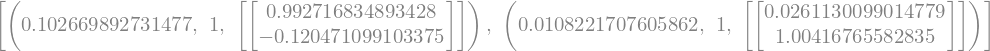

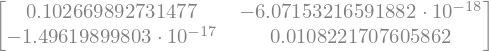

In [5]:
sp.init_printing()
display(A.eigenvects())
P=sp.Matrix([[0.992716834893428,0.0261130099014779],
             [-0.120471099103375,1.00416765582835]])
P.inv()@A@P

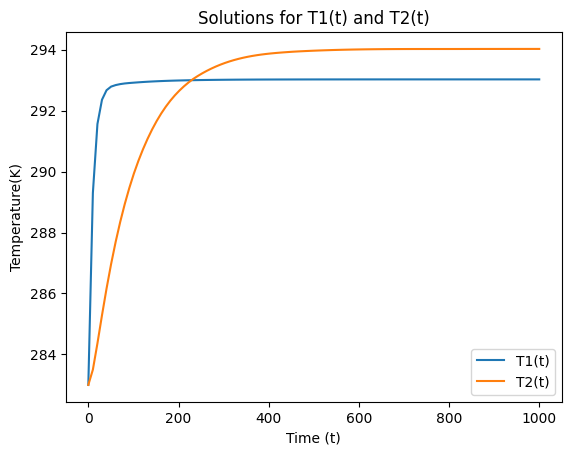

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def funcs(t, T):
    T1, T2 = T
    dT1dt = -0.102380952380952 * T1 + 0.00238095238095238 * T2 + 29.3
    dT2dt = 0.0111111111111111 * T1 - 0.0111111111111111 * T2 + 0.0111111111111111 - 0.0111111111111111 * np.exp(-t * 5)
    return [dT1dt, dT2dt]
ics = [283,283]
t_eval = np.linspace(0, 1000, 100)
solution = solve_ivp(funcs, (0, 1000), ics,method='Radau' ,t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Temperature(K)")
plt.legend()
plt.title("Solutions for T1(t) and T2(t)")
plt.show()

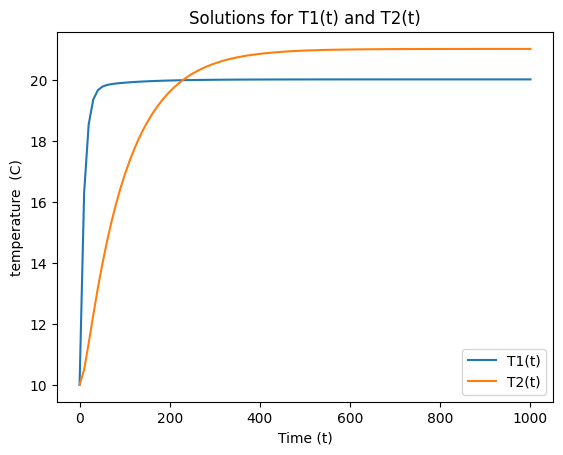

In [28]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def funcs(t, T):
    T1, T2 = T
    dT1dt = -0.102380952380952 * T1 + 0.00238095238095238 * T2 + 2.0
    dT2dt = 0.0111111111111111 * T1 - 0.0111111111111111 * T2 + 0.0111111111111111 - 0.0111111111111111 * np.exp(-t * 5)
    return [dT1dt, dT2dt]
ics = [10,10]
t_eval = np.linspace(0, 1000, 100)
solution = solve_ivp(funcs, (0, 1000), ics,method='Radau' ,t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.xlabel("Time (t)")
plt.ylabel("temperature  (C)")
plt.legend()
plt.title("Solutions for T1(t) and T2(t)")
plt.show()

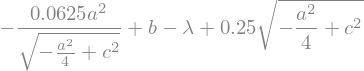

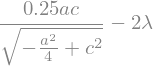

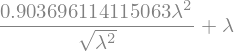

In [132]:
#q2
a,b,c,l = sp.symbols('a b c lambda')
constraint=a+2*b+2*c-100
B=a/2
H=sp.sqrt(c**2-(a/2)**2)
function=a*b+(1/2*H*B)
x,y,z=function.diff(a)-l*constraint.diff(a),function.diff(b)-l*constraint.diff(b),function.diff(c)-l*constraint.diff(c)
display(x,y,z)
A=sp.solve(y,a)[0]
C=sp.solve(z.subs(a,A),c)[1]
B=sp.solve(x.subs(a,A).subs(c,C),b)[0]
display(A,B,C)
L=sp.solve(constraint.subs(a,A).subs(b,B).subs(c,C),l)[0]
Aval=A.subs(l,L)
Bval=B.subs(l,L)
Cval=C.subs(l,L)
display(Aval,Bval,Cval)

In [131]:
import numpy as np
from scipy.optimize import minimize

def optimize(perimeter):
    cons = ({'type': 'eq', 'fun' : lambda x: perimeter - (x[0]+2*x[1]+2*x[2])})
    bnds = ((0, None), (0, None), (0, None))
    f = lambda x: -(x[0]*x[1] + 0.25*x[0]*np.sqrt(-x[0]**2/4 + x[2]**2))
    res = minimize(f, (10,2,20), bounds=bnds, constraints=cons)
    return res

# Call the optimize function to perform the optimization with x[0] surface perimeter of 10
res = optimize(100)

# Print the optimized values of the decision variables
print("Optimized values: ", res.x)

Optimized values:  [25.40333143 24.18010564 13.11822865]


D:\Users\Hamish\AppData\Local\Temp\ipykernel_15688\3938791093.py:7: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: -(x[0]*x[1] + 0.25*x[0]*np.sqrt(-x[0]**2/4 + x[2]**2))


In [97]:
x,y=sp.symbols('x y')
density=sp.cos(y)/y
M=sp.integrate(density,(y,2*x,sp.pi/2),(x,0,sp.pi/4))
display(M)

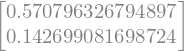

In [100]:
X=sp.integrate(density*y,(y,2*x,sp.pi/2),(x,0,sp.pi/4))/M
Y=sp.integrate(density*x,(y,2*x,sp.pi/2),(x,0,sp.pi/4))/M
coord=sp.Matrix([X.evalf(),Y.evalf()])
display(coord)